# Лабораторная работа
Тимофеев Дмитрий БСТ204

Вариант 16

Данное исследование будет разделено на две части:
* Демографичская часть
* Актуарная часть

В разделе №1 будет проведен анализ смертности сельского населения мужского пола в Пензенской области за 1994,2007, 2016 и 2020 годы.

В разделе №2 в ходе данного исследования будет проведен расчет страховых тарифов для различных видов страхования с разным периодом действия договоров.

Будет произведен сравнительный анализ:

* кривых смертности и графиков вероятностей за различные годы
* демографической статистики региона за 2020 года и России в целом за тот же временной промежуток
* статистики смертности в Пензенской области за 2016 и 2020 годы
* статистики смертности в Российской Федерации за 2016 и 2020 годы
* категорий индивидов, которым тот или иной довгор обходяться дороже
* единовременной или ежегодной уплаты взносов
* цены договора с зависимости от различных характеристик индивида
Все расчеты производятся на основании 4-х столбцов вероятностей смерти, представленных далее в работе, для мужчин соответствующего региона, взятых из листа Q1156LM файла, содержащего таблицы смертности различных регионов России *(Data_life_2022.xlsx)*.

# Демографическая статистика

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import log as ln
import math
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
# ниже вылезают предупреждения, что вношу изменения в нескопированный дф
# пробовал поставить .copy(), но всё равно продолжает ругаться, обычно помогает

data = pd.read_excel('Life_data.xlsx')
data

,1994,2007,2013,2016,2020
0,0.01768,0.015606,0.007978,0.007402,0.008209
1,0.00071,0.001426,0.000421,0.000136,0.000248
2,0.00131,0.001426,0.000421,0.000136,0.000248
3,0.00167,0.000608,0.000421,0.000136,0.000248
4,0.00185,0.000608,0.000421,0.000136,0.000248
...,...,...,...,...,...
96,0.36841,0.435282,0.263217,0.156289,0.062500
97,0.39223,0.435282,0.263217,0.156289,0.062500
98,0.41712,0.435282,0.263217,1.000000,0.062500
99,0.44303,0.435282,0.263217,NaN,0.062500


## Пункт 1

Напишем функцию, которая позволяет добавлять новые столбцы в датасет, чтобы добавить  иллюстрирующие количество живых и умерших в возрасте n лет за каждый временной промежуток:

In [5]:
def podg(data,column,length):
  data['lx'+ str(column)] = 0
  data['dx'+ str(column)] = 0
  data['lx'+ str(column)][0] = 100000
  for i in range(1,length):
    data['lx'+ str(column)][i] = data['lx'+ str(column)][i-1]-data[column][i-1]*data['lx'+str(column)][i-1]
  for k in range(length-1):
    data['dx'+ str(column)][k] = data['lx'+str(column)][k] - data['lx'+str(column)][k+1]
  data['dx'+str(column)][length-1] = data['lx'+str(column)][length-1]
podg(data,1994,101)
podg(data,2007,101)
podg(data,2013,101)
podg(data,2016,100)
podg(data,2020,100)

In [6]:
qx1994 = data[1994]
qx2007 = data[2007]
qx2013 = data[2013]
qx2016 = data[2016]
qx2020 = data[2020]

In [7]:
data.head() # теперь все колонки на месте

,1994,2007,2013,2016,2020,lx1994,dx1994,lx2007,dx2007,lx2013,dx2013,lx2016,dx2016,lx2020,dx2020
0,0.01768,0.015606,0.007978,0.007402,0.008209,100000.000000,1768.000000,100000.000000,1560.600000,100000.000000,797.800000,100000.000000,740.200000,100000.000000,820.900000
1,0.00071,0.001426,0.000421,0.000136,0.000248,98232.000000,69.744720,98439.400000,140.374584,99202.200000,41.764126,99259.800000,13.499333,99179.100000,24.596417
2,0.00131,0.001426,0.000421,0.000136,0.000248,98162.255280,128.592554,98299.025416,140.174410,99160.435874,41.746544,99246.300667,13.497497,99154.503583,24.590317
3,0.00167,0.000608,0.000421,0.000136,0.000248,98033.662726,163.716217,98158.851005,59.680581,99118.689330,41.728968,99232.803170,13.495661,99129.913266,24.584218
4,0.00185,0.000608,0.000421,0.000136,0.000248,97869.946509,181.059401,98099.170424,59.644296,99076.960362,41.711400,99219.307509,13.493826,99105.329048,24.578122


Построим графики для количества умерших и вероятности смерти:

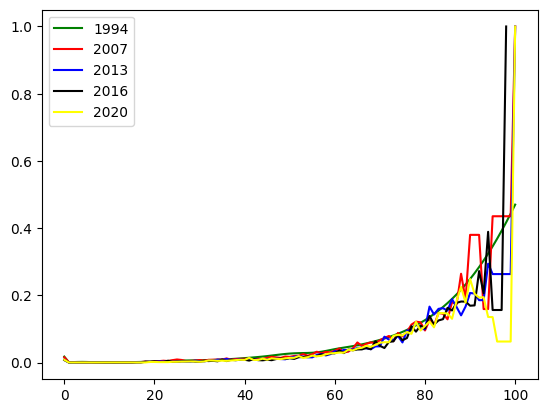

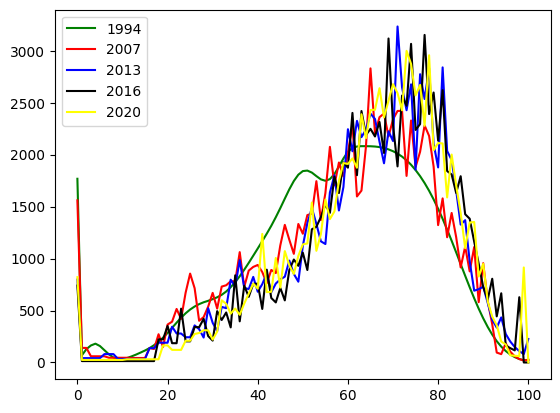

In [8]:
fig, ax = plt.subplots()

ax.plot(qx1994, color = 'green', label = '1994')
ax.plot(qx2007, color = 'red', label = '2007')
ax.plot(qx2013, color = 'blue', label = '2013')
ax.plot(qx2016, color = 'black', label = '2016')
ax.plot(qx2020, color = 'yellow', label = '2020')

ax.legend(loc = 'upper left')
plt.show()

fig, ax = plt.subplots()

ax.plot(data['dx1994'], color = 'green', label = '1994')
ax.plot(data['dx2007'], color = 'red', label = '2007')
ax.plot(data['dx2013'], color = 'blue', label = '2013')
ax.plot(data['dx2016'], color = 'black', label = '2016')
ax.plot(data['dx2020'], color = 'yellow', label = '2020')

ax.legend(loc = 'upper left')
plt.show()

Графики иллюстрируют увеличение количества умерших с увеличением возраста
индивидов до возраста примерно 75 лет. После этого происходит постепенное снижение количества умерших, что связано с тем, что малое количество индивидов доживают до последующих возрастов.

Однако по графикам сложно делать какие-то однозначение выводы, поэтому справедливо разбить людей по категориям:

* от 0 до 6 лет
* от 7 до 17 лет
* от 18 до 30 лет
* от 31 до 61 лет
* от 62 до 80 лет
* от 80 до 100 лет

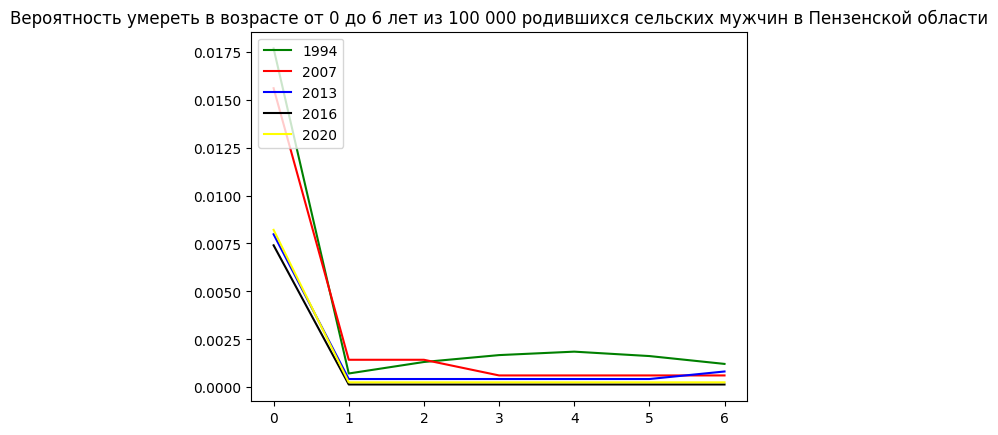

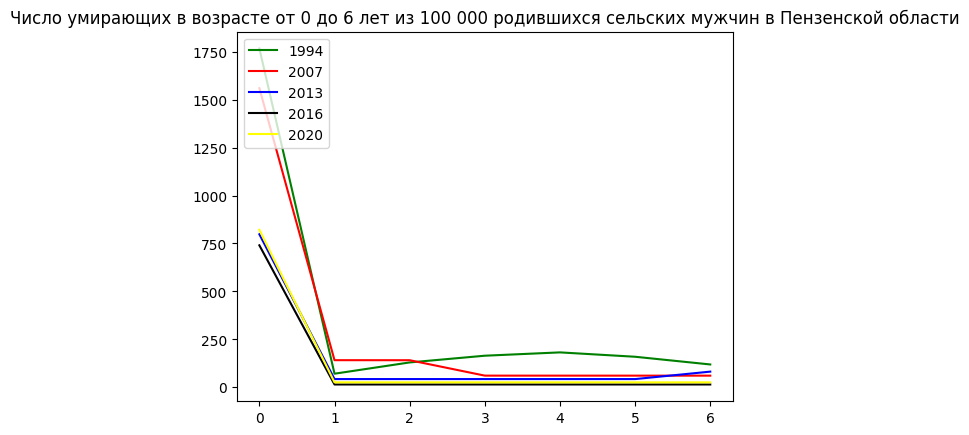

In [9]:
fig, ax = plt.subplots()

ax.plot(qx1994[0:7], color = 'green', label = '1994')
ax.plot(qx2007[0:7], color = 'red', label = '2007')
ax.plot(qx2013[0:7], color = 'blue', label = '2013')
ax.plot(qx2016[0:7], color = 'black', label = '2016')
ax.plot(qx2020[0:7], color = 'yellow', label = '2020')

ax.legend(loc = 'upper left')
ax.set_title("Вероятность умереть в возрасте от 0 до 6 лет из 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()

fig, ax = plt.subplots()

ax.plot(data['dx1994'][0:7], color = 'green', label = '1994')
ax.plot(data['dx2007'][0:7], color = 'red', label = '2007')
ax.plot(data['dx2013'][0:7], color = 'blue', label = '2013')
ax.plot(data['dx2016'][0:7], color = 'black', label = '2016')
ax.plot(data['dx2020'][0:7], color = 'yellow', label = '2020')

ax.legend(loc = 'upper left')
ax.set_title("Число умирающих в возрасте от 0 до 6 лет из 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()

Количество умерших уменьшается, также как вероятность умереть с каждым следующим рассматриваемым годом для возраста 0 лет, исключая 2020 год, что вероятней всего связано с эпидемией COVID-19 в России и вероятностью заражения и тяжестью COVID-19 у новорожденных . При рассмотрении других возрастов проявляется тенденция к сохранению примерно одинаковых значений как вероятности умереть в возрасте x лет, так и количества умерших в возрасте x лет.

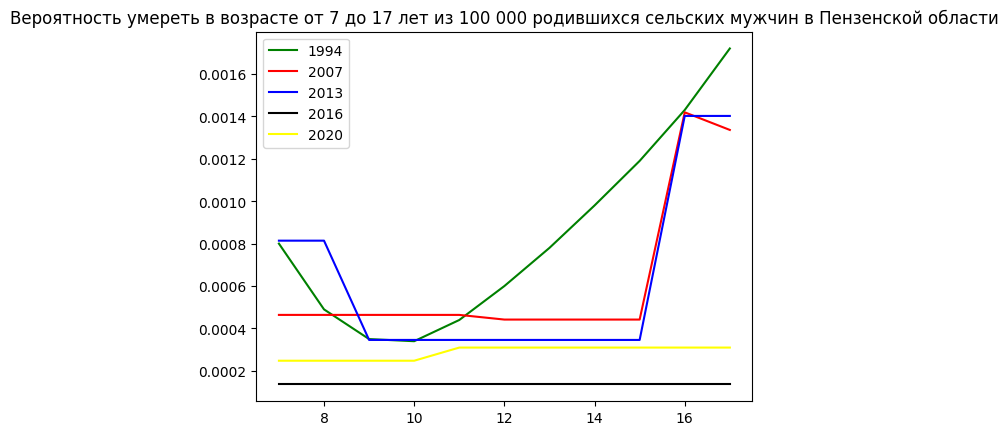

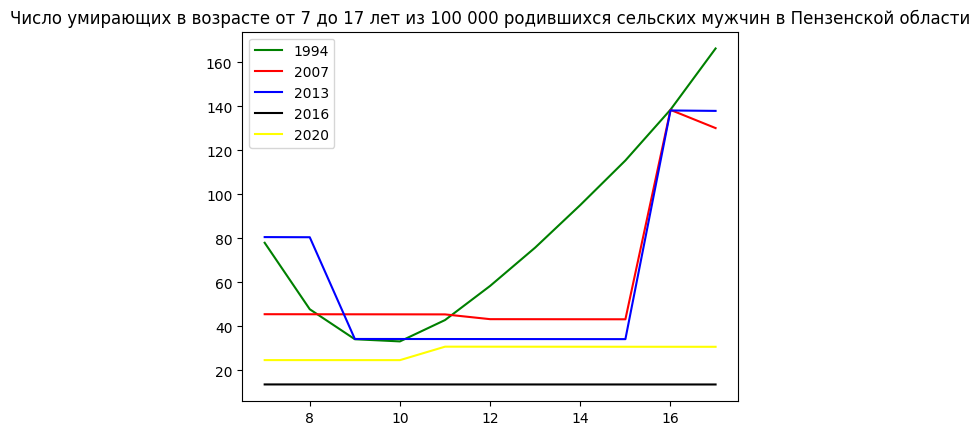

In [10]:
fig, ax = plt.subplots()

ax.plot(qx1994[7:18], color = 'green', label = '1994')
ax.plot(qx2007[7:18], color = 'red', label = '2007')
ax.plot(qx2013[7:18], color = 'blue', label = '2013')
ax.plot(qx2016[7:18], color = 'black', label = '2016')
ax.plot(qx2020[7:18], color = 'yellow', label = '2020')

ax.legend(loc = 'upper left')
ax.set_title("Вероятность умереть в возрасте от 7 до 17 лет из 100 000 родившихся сельских мужчин в Пензенской области")

plt.show()


fig, ax = plt.subplots()

ax.plot(data['dx1994'][7:18], color = 'green', label = '1994')
ax.plot(data['dx2007'][7:18], color = 'red', label = '2007')
ax.plot(data['dx2013'][7:18], color = 'blue', label = '2013')
ax.plot(data['dx2016'][7:18], color = 'black', label = '2016')
ax.plot(data['dx2020'][7:18], color = 'yellow', label = '2020')

ax.legend(loc = 'upper left')
ax.set_title("Число умирающих в возрасте от 7 до 17 лет из 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()

Видно, что графики веротности смертей 2007 и 2013 годов довольно похожи. Так же число умирающих практически одно и тоже. В 2007 году очень малое число умерших.
Количество умерших уменьшается, также как вероятность умереть с каждым следующим рассматриваемым годом для возраста 7 лет, исключая 1994 год. При рассмотрении других возрастов проявляется тенденция к уменьшению как вероятности умереть в возрасте x лет, так и количество умерших в возрасте x лет при рассмотрении 2007, 2013, 2016 и 2020 годов с каждым последующим рассматриваемым периодом.



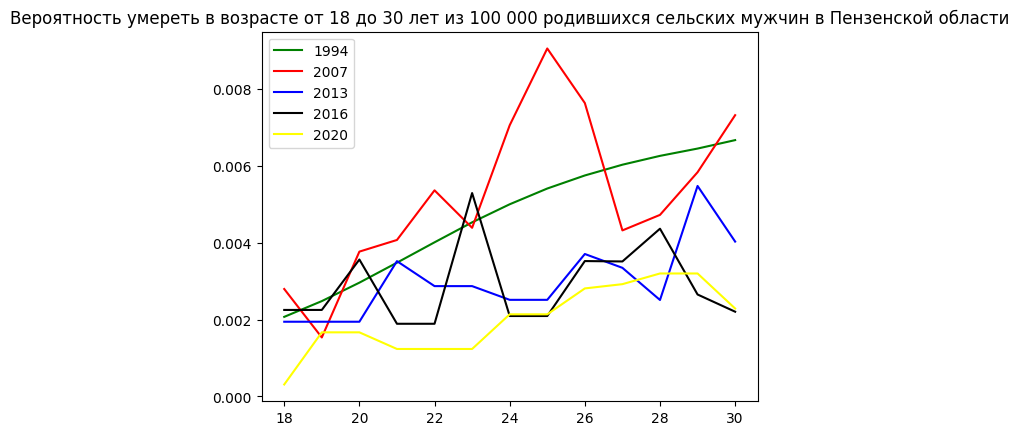

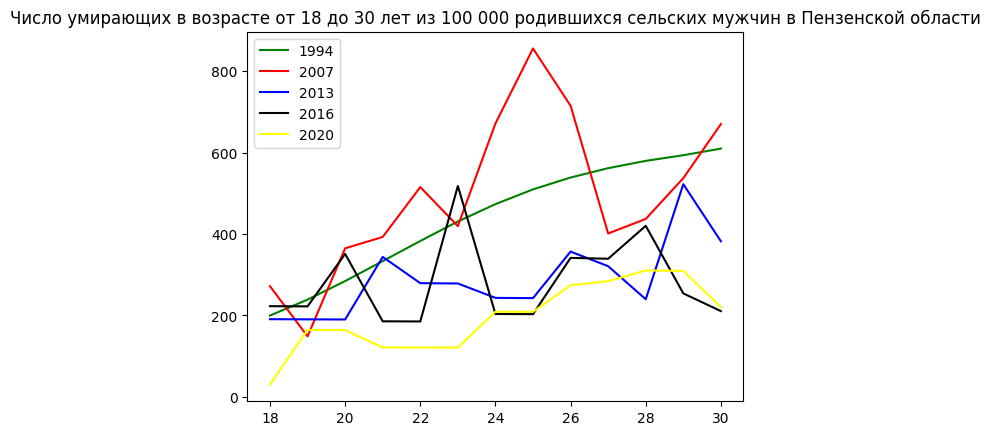

In [11]:
fig, ax = plt.subplots()

ax.plot(qx1994[18:31], color = 'green', label = '1994')
ax.plot(qx2007[18:31], color = 'red', label = '2007')
ax.plot(qx2013[18:31], color = 'blue', label = '2013')
ax.plot(qx2016[18:31], color = 'black', label = '2016')
ax.plot(qx2020[18:31], color = 'yellow', label = '2020')

ax.legend(loc = 'upper left')
ax.set_title("Вероятность умереть в возрасте от 18 до 30 лет из 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()


fig, ax = plt.subplots()

ax.plot(data['dx1994'][18:31], color = 'green', label = '1994')
ax.plot(data['dx2007'][18:31], color = 'red', label = '2007')
ax.plot(data['dx2013'][18:31], color = 'blue', label = '2013')
ax.plot(data['dx2016'][18:31], color = 'black', label = '2016')
ax.plot(data['dx2020'][18:31], color = 'yellow', label = '2020')

ax.legend(loc = 'upper left')
ax.set_title("Число умирающих в возрасте от 18 до 30 лет из 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()

В целом графики иллюстрируют увеличение кол-ва умерших и вероятности умереть с увеличением возраста индивидов. Исключение составляет поведение кривой смертности за 2007 год после ~25 лет - происходит снижение и кол-ва умерших, и вероятности умереть. Аналогичным поведением характиризуются показатель зв 2020 год для возраста 29-30 лет.

Также можно отметить отсутствие сильного влияния эпидемии COVID-19 на данную возрастную группу.

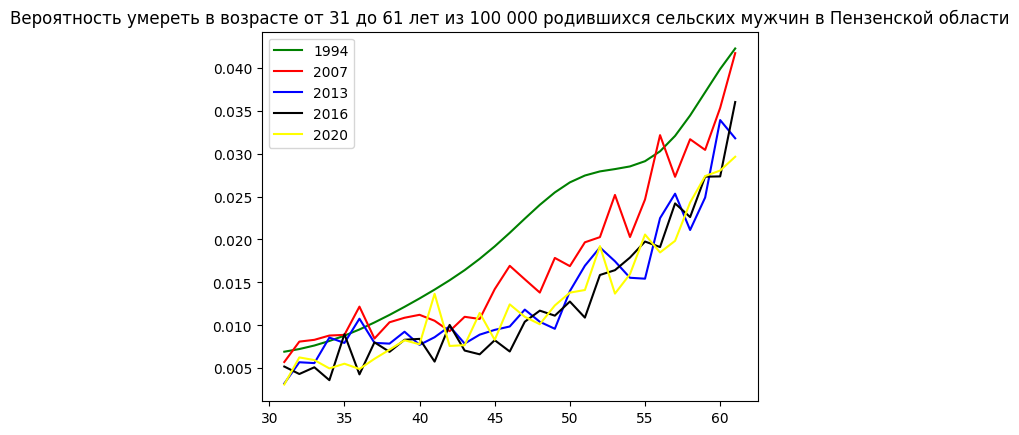

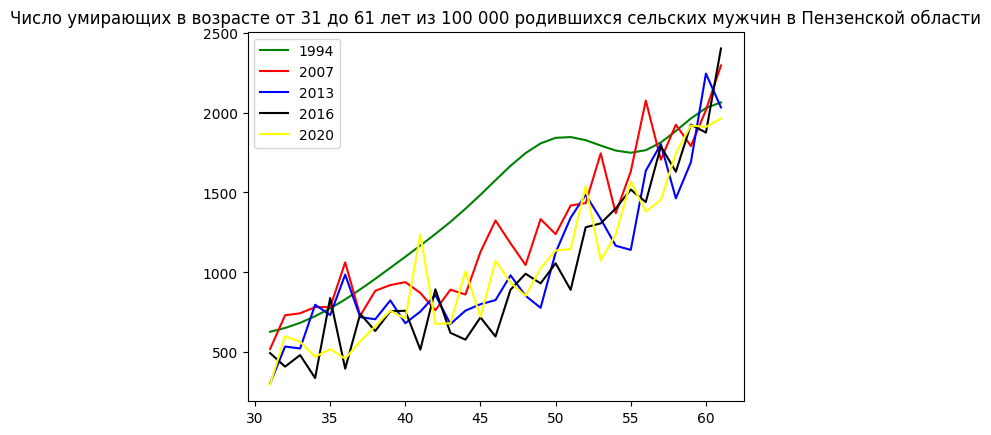

In [12]:
fig, ax = plt.subplots()

ax.plot(qx1994[31:62], color = 'green', label = '1994')
ax.plot(qx2007[31:62], color = 'red', label = '2007')
ax.plot(qx2013[31:62], color = 'blue', label = '2013')
ax.plot(qx2016[31:62], color = 'black', label = '2016')
ax.plot(qx2020[31:62], color = 'yellow', label = '2020')

ax.legend(loc = 'upper left')
ax.set_title("Вероятность умереть в возрасте от 31 до 61 лет из 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()

fig, ax = plt.subplots()

ax.plot(data['dx1994'][31:62], color = 'green', label = '1994')
ax.plot(data['dx2007'][31:62], color = 'red', label = '2007')
ax.plot(data['dx2013'][31:62], color = 'blue', label = '2013')
ax.plot(data['dx2016'][31:62], color = 'black', label = '2016')
ax.plot(data['dx2020'][31:62], color = 'yellow', label = '2020')

ax.legend(loc = 'upper left')
ax.set_title("Число умирающих в возрасте от 31 до 61 лет из 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()

Количество умерших немного увеличивается, также как вероятность умереть с каждым следующим рассматриваемым годом практически для каждого возраста. В целом графики иллюстрируют увеличение кол-ва умерших и вероятности умереть с увеличением возраста индивидов.

Стоит также отметить, что ближе к 60 годам, кол-во умерших и вероятность умереть за 2020 год первышают аналогичные показатели за 2016 год, что может быть обусловлено COVID-19, так как пожилые люди представляли собой наиболее уязвимую категорию.

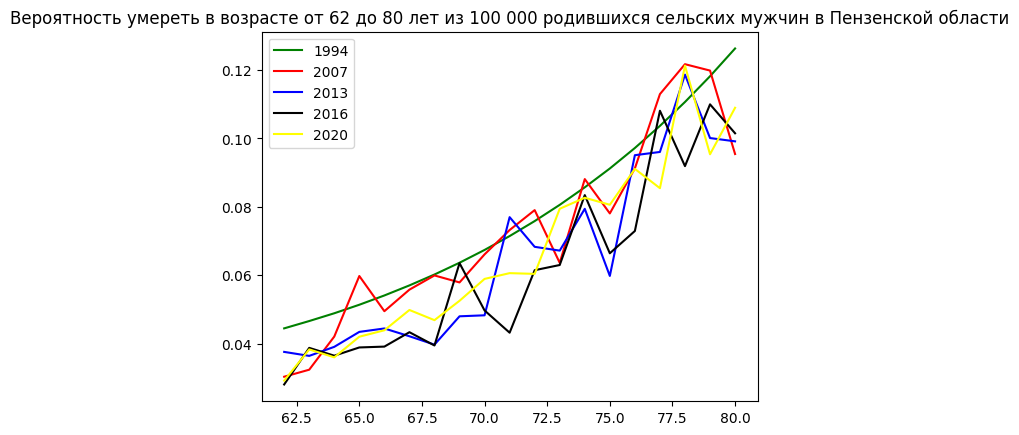

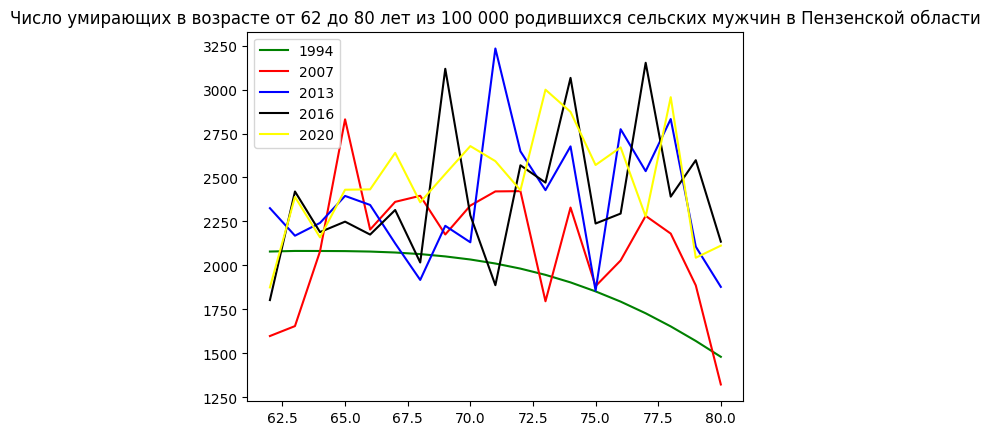

In [13]:
fig, ax = plt.subplots()

ax.plot(qx1994[62:81], color = 'green', label = '1994')
ax.plot(qx2007[62:81], color = 'red', label = '2007')
ax.plot(qx2013[62:81], color = 'blue', label = '2013')
ax.plot(qx2016[62:81], color = 'black', label = '2016')
ax.plot(qx2020[62:81], color = 'yellow', label = '2020')

ax.legend(loc = 'upper left')
ax.set_title("Вероятность умереть в возрасте от 62 до 80 лет из 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()

fig, ax = plt.subplots()

ax.plot(data['dx1994'][62:81], color = 'green', label = '1994')
ax.plot(data['dx2007'][62:81], color = 'red', label = '2007')
ax.plot(data['dx2013'][62:81], color = 'blue', label = '2013')
ax.plot(data['dx2016'][62:81], color = 'black', label = '2016')
ax.plot(data['dx2020'][62:81], color = 'yellow', label = '2020')

ax.legend(loc = 'upper left')
ax.set_title("Число умирающих в возрасте от 62 до 80 лет из 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()

График количества умерших довольно-таки сложен для анализа, так как количество умерших может увеличиваться с каждым последним рассматриваемым годом из-за того, что большее кол-во индивидов в целом дожили до определенного возраста.

При рассмотрение графика вероятности умереть можно отметить постепенное увеличение вероятности умереть с увеличением возраста индивида.

Стоит отметить, что периодически кол-во умерших и вероятность умереть за 2020 год первышают аналогичные показатели за 2016 год, что может быть обусловлено COVID-19, так как пожилые люди представляли собой наиболее уязвимую категорию. Особенно это заметно для возраста 76-77 лет.

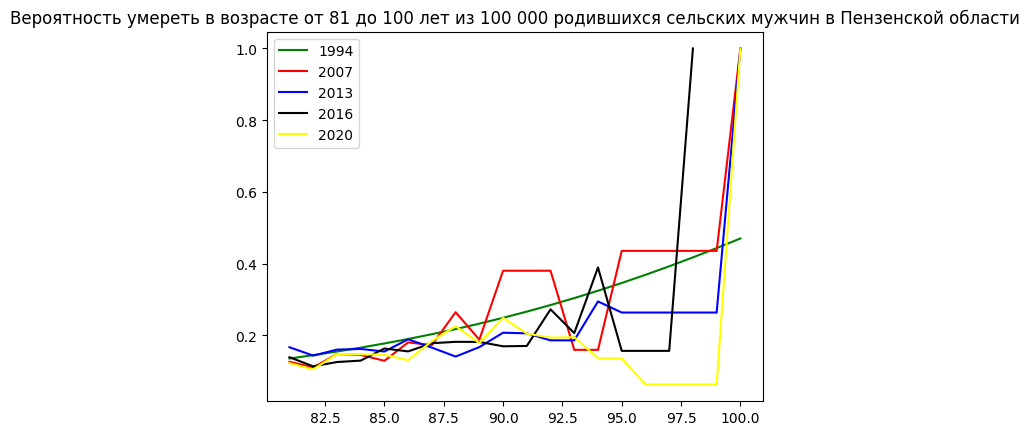

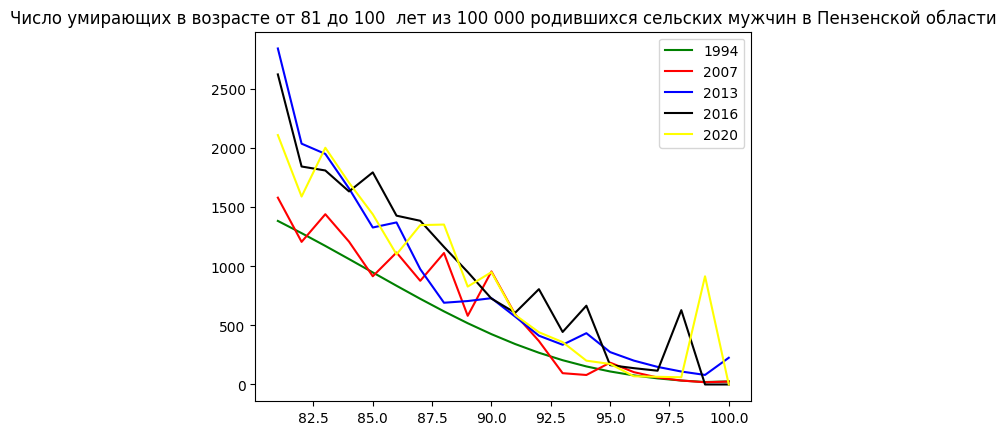

In [14]:
fig, ax = plt.subplots()

ax.plot(qx1994[81:], color = 'green', label = '1994')
ax.plot(qx2007[81:], color = 'red', label = '2007')
ax.plot(qx2013[81:], color = 'blue', label = '2013')
ax.plot(qx2016[81:], color = 'black', label = '2016')
ax.plot(qx2020[81:], color = 'yellow', label = '2020')

ax.legend(loc = 'upper left')
ax.set_title("Вероятность умереть в возрасте от 81 до 100 лет из 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()


fig, ax = plt.subplots()

ax.plot(data['dx1994'][81:], color = 'green', label = '1994')
ax.plot(data['dx2007'][81:], color = 'red', label = '2007')
ax.plot(data['dx2013'][81:], color = 'blue', label = '2013')
ax.plot(data['dx2016'][81:], color = 'black', label = '2016')
ax.plot(data['dx2020'][81:], color = 'yellow', label = '2020')

ax.legend(loc = 'upper right')
ax.set_title("Число умирающих в возрасте от 81 до 100  лет из 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()

При рассмотрении графика также стоит отметить, что количество умерших за 1994 год выше, чем за 2007, как и вероятность смерти. Однако количество умерших за 2013, 2016 и 2020 годы выше аналогичного показателя за 1994 и 2007 годы, что может говорить о том, что большее кол-во людей в целом доживают до возраста более 81. При рассмотрении данного показателя за 2013, 2016 и 2020 годы стоит отметить, что показатели за 2020 год выше, чем за 2016, что может быть связано с эпидемией COVID-19, так как пожилые люди являются наиболее уязвимой категорий для данной болезни.

При рассмотрении вероятности умереть стоит также отметить тот факт, что при рассмотрении 2020 года в сравнении с 2013 и 2016, также наблюдаюся более высокие значения, что может быть также обусловлено указанным выше фактом. При рассмотрении 1994, 2007, 2013 и 2016 годов обобщая, можно отметить снижение вероятности смерти с каждым последующим рассматриваемым периодом.

## Пункт 2

Следующим этапом будет определен возрастной интервал исследования по кривой 2020 г. – от 20 лет до X лет согласно кривой 𝒒𝒙. Для этого необходимо в первую очередь рассмотреть кривую смертности за 2020 год:

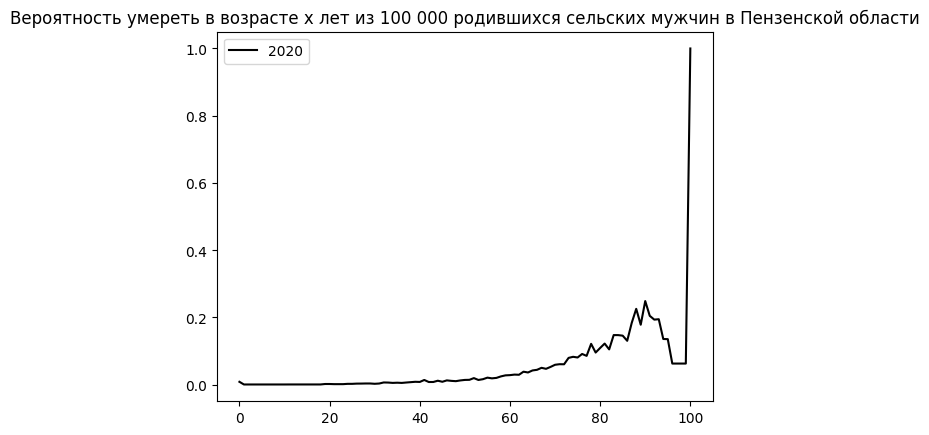

In [15]:
fig, ax = plt.subplots()

ax.plot(data[2020], color = 'black', label = '2020')

ax.legend(loc = 'upper left')
ax.set_title("Вероятность умереть в возрасте x лет из 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()

По графику можно скзать, что веротяность начинает резко возрастать в промежутке от 70 до 80 лет. Рассмотрим данный возрастной период подробнее:

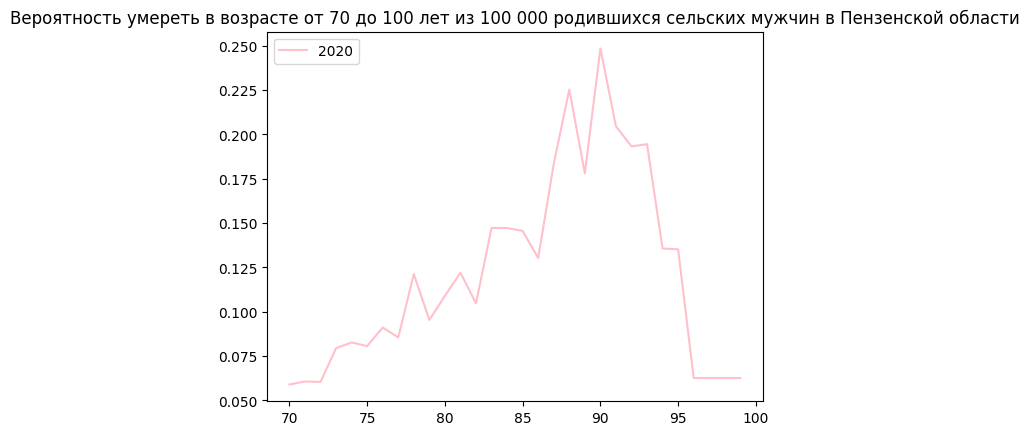

In [16]:
fig, ax = plt.subplots()

ax.plot(data[2020][70:100], color = 'pink', label = '2020')

ax.legend(loc = 'upper left')
ax.set_title("Вероятность умереть в возрасте от 70 до 100 лет из 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()

По данному графику можно сделать вывод о тои, что возрастной интервал нашего исследования будет следующим:

* **от 20 до 73 лет**

## Пункт 3

Следующим этапом построим кривую дожития и функцию распределения продолжительности предстоящей жизни для данных 2020 года:

In [17]:
data2020 = data[[2020,'lx2020','dx2020']]
for i in range(len(data2020)-1):
  data2020.loc[i,'S(x)'] = data['lx2020'][i]/data['lx2020'][0]
  data2020.loc[i,'F(x)'] = 1-(data['lx2020'][i]/data['lx2020'][0])

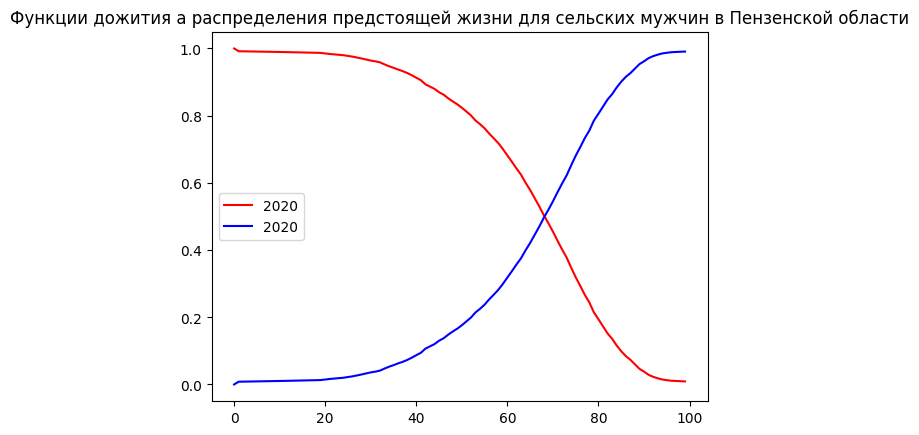

In [18]:
fig, ax = plt.subplots()

ax.plot(data2020['S(x)'], color = 'red', label = '2020')
ax.plot(data2020['F(x)'], color = 'blue', label = '2020')

ax.legend(loc = 'center left')
ax.set_title("Функции дожития а распределения предстоящей жизни для сельских мужчин в Пензенской области")
plt.show()

Функция дожития иллюстрирует очень медленное убывание до возраста примерно 40 лет, далее происходит более резкое убывание. Следующую точку перегиба можно отметить в районе 60-70 лет

Распределение оставшейся жизни ведет себя аналогично функции дожития, но возрастает.

## Пункт 4

Следующим этапом будет произведено сравнение результатов за 2020 год демографической статистики в Пензенской области с ситуацией за 2020 г. по России в целом и по России мужского пола сельского населения:

In [19]:
datarusall = pd.read_excel('Life_data2.xlsx')

In [20]:
podg(datarusall,'all2020',101)
podg(datarusall,'more2020',101)
podg(datarusall,'all2019',101)
podg(datarusall,'all2016',101)
for i in tqdm(range(len(datarusall))):
  datarusall.loc[i,'S(x)all'] = datarusall['lxall2020'][i]/100000
  datarusall.loc[i,'F(x)all'] = 1-(datarusall['lxall2020'][i]/100000)
  datarusall.loc[i,'S(x)more'] = datarusall['lxmore2020'][i]/100000
  datarusall.loc[i,'F(x)more'] = 1-(datarusall['lxmore2020'][i]/100000)

100%|██████████| 101/101 [00:00<00:00, 1935.75it/s]


In [21]:
datarusall.head()

,all2020,more2020,all2016,all2019,lxall2020,dxall2020,lxmore2020,dxmore2020,lxall2019,dxall2019,lxall2016,dxall2016,S(x)all,F(x)all,S(x)more,F(x)more
0,0.004491,0.005982,0.008362,0.006199,100000.000000,449.100000,100000.000000,598.200000,100000.000000,619.900000,100000.000000,836.200000,1.000000,0.000000,1.000000,0.000000
1,0.000421,0.000609,0.000873,0.000681,99550.900000,41.910929,99401.800000,60.535696,99380.100000,67.677848,99163.800000,86.569997,0.995509,0.004491,0.994018,0.005982
2,0.000260,0.000390,0.000490,0.000455,99508.989071,25.872337,99341.264304,38.743093,99312.422152,45.187152,99077.230003,48.547843,0.995090,0.004910,0.993413,0.006587
3,0.000212,0.000353,0.000386,0.000343,99483.116734,21.090421,99302.521211,35.053790,99267.235000,34.048662,99028.682160,38.225071,0.994831,0.005169,0.993025,0.006975
4,0.000162,0.000233,0.000344,0.000268,99462.026313,16.112848,99267.467421,23.129320,99233.186338,26.594494,98990.457089,34.052717,0.994620,0.005380,0.992675,0.007325


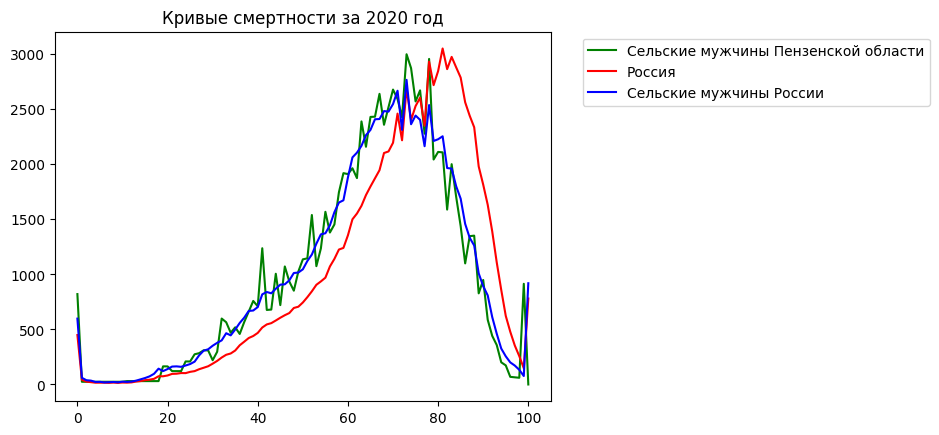

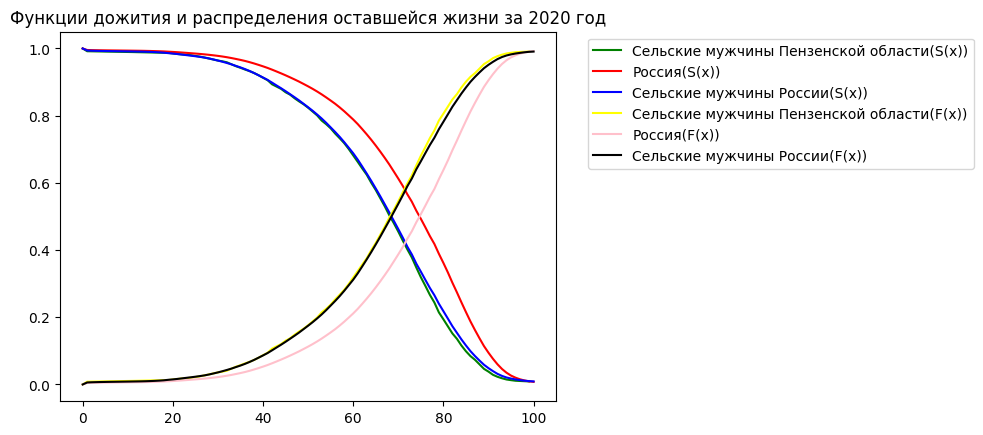

In [22]:
fig, ax = plt.subplots()

ax.plot(data2020['dx2020'], color = 'green', label = "Сельские мужчины Пензенской области")
ax.plot(datarusall['dxall2020'], color = 'red', label = "Россия")
ax.plot(datarusall['dxmore2020'], color = 'blue', label = "Сельские мужчины России")

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Кривые смертности за 2020 год")
plt.show()

fig, ax = plt.subplots()

ax.plot(data2020['S(x)'], color = 'green', label = "Сельские мужчины Пензенской области(S(x))")
ax.plot(datarusall['S(x)all'], color = 'red', label = "Россия(S(x))")
ax.plot(datarusall['S(x)more'], color = 'blue', label = "Сельские мужчины России(S(x))")
ax.plot(data2020['F(x)'], color = 'yellow', label = "Сельские мужчины Пензенской области(F(x))")
ax.plot(datarusall['F(x)all'], color = 'pink', label = "Россия(F(x))")
ax.plot(datarusall['F(x)more'], color = 'black', label = "Сельские мужчины России(F(x))")

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Функции дожития и распределения оставшейся жизни за 2020 год")
plt.show()

При рассмотрении кривых смерти можно отметить схожесть поведения функций вне зависимости от выбранной территории и категории населения. Сначала происходит рост количества умерших индивидов примерно до возраста 70-80 лет, а после происходит уменьшение количества умерших, что может быть связано в целом с малым количеством индивидов в возрасте больше 80.

Пик количества умерших сельских мужчин Пензенской области приходиться примерно на 78 лет и составляет ~ 5000 индивидов. Пик количества умерших сельских мужчин России приходиться на 76 лет и составляет меньшее значение - ~2800. Пик количества умерших среди всего наседения России приходиться примерно на 82 года, а количество умерших составляет примерно 3000 человек - такая разница может быть обусловлена тем, что рассматривается все население России, а не только мужчины(средний возраст смерти выше среди женщин -> при рассмотрении всего населения средний возраст будет выше).

При рассмотрении функций дожития и распреления оставшейся жизни разных территорий и категорий можно отметить, что наиболее плавной представляются функции, построенные по всему населению России, что обусловлено включением женщин, чей средний возраст выше. Наиболее резкими представляются функции сельских мужчин по России в целом, что может говорить о том, что в среднем смертность сельских мужчин Пензенской области ниже смертности сельсих мужчин по России в целом.

## Пункт 5

Следующим этапом будет произведен сравнительный анализ статистики по РФ в разные годы с целью изучения влияния пандемии COVID-19 (2020 г. по сравнению с 2016 и 2019 г.) по Пензенской области и мужскому пол, и по России в целом:

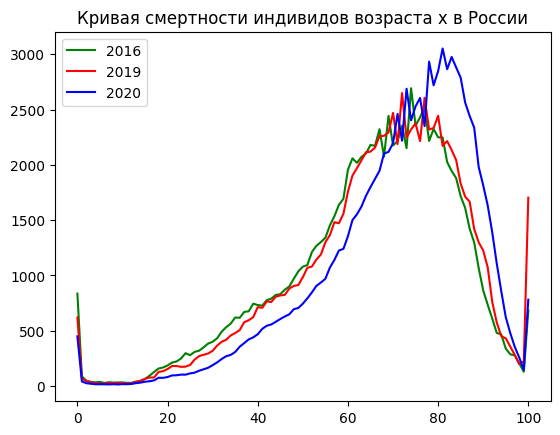

In [23]:
fig, ax = plt.subplots()

ax.plot(datarusall['dxall2016'], color = 'green', label = '2016')
ax.plot(datarusall['dxall2019'], color = 'red', label = "2019")
ax.plot(datarusall['dxall2020'], color = 'blue', label = "2020")

ax.legend(loc = 'upper left')
ax.set_title("Кривая смертности индивидов возраста x в России")
plt.show()

При рассмотрении кривых смертности России за 2016 и 2019-2020 пандемийные годы можно отметить, что COVID-19 не оказал особого влияния на поведение кривых. Однако можно отметить, что кривая 2020 года смещена влево относительно кривой 2019 года, что говорит о смещении пика количество умерших людей. Также стоит отметить, что при рассмотрении возрастного интервала до 80-85 лет количество умерших за 2020 год практически всегда превышает аналогичные показатели за 2019 и 2020 года, что говорит о том, что пандемия повлияла на смертность населения России, особенно это заметно по возрастному интервалу примерно с 60 до 78. Это связано с тем, что пожилое население представляло собой наиболее уязвимую группу для COVID-19.

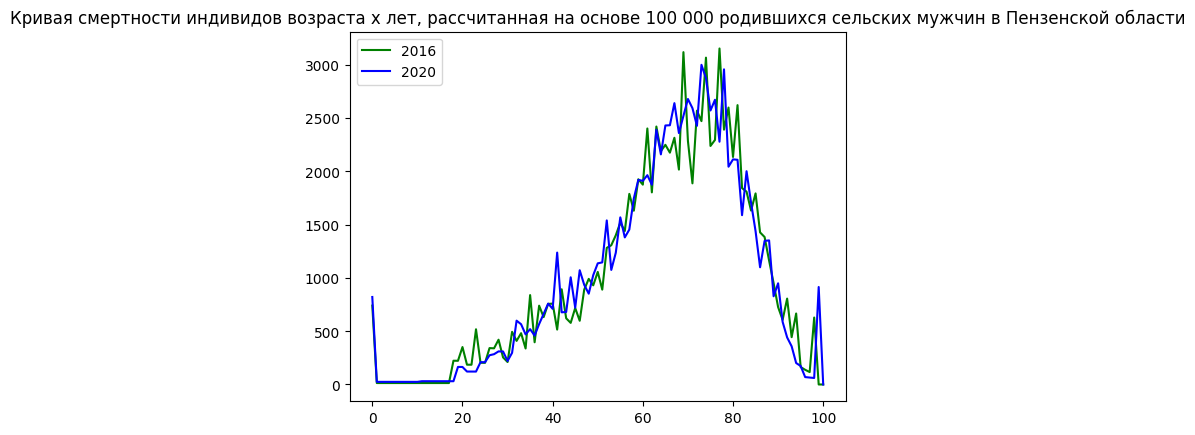

In [24]:
fig, ax = plt.subplots()

ax.plot(data['dx2016'], color = 'green', label = '2016')
ax.plot(data['dx2020'], color = 'blue', label = "2020")

ax.legend(loc = 'upper left')
ax.set_title("Кривая смертности индивидов возраста x лет, рассчитанная на основе 100 000 родившихся сельских мужчин в Пензенской области")
plt.show()

При рассмотрении кривых смертности сельских мужчин Пензенской области за 2016 и 2020 годы можно отметить, что COVID-19 не оказал особого влияния на поведение кривых. Однако стоит отметить, что количество умерших за 2020 год часто превышает аналогичный показатель за 2016 год, что говорит о том, что пандемия повлияла на смертность сельских мужчин Пензенской области, особенно это заметно по возрастному интервалу примерно с 70 до 78. Это связано с тем, что пожилое население представляло собой наиболее уязвимую группу для COVID-19. Также стоит отметить, что отличия между пандемийными и 2016 годами для сельских мужчин Пензенской области значительно ниже, чем для населения России в целом.

# Актуарный раздел

Рассчитаем сроки и нормы доходности

In [25]:
k = 1
r = 6
tabl = pd.DataFrame({"Срок1": [(5+k)*2],"Срок2": [(5+k)*3],"Норма доходности 1":[(3+r/2)/100],"Норма доходности 2":[2*(3+r/2)/100]})
tabl

,Срок1,Срок2,Норма доходности 1,Норма доходности 2
0,12,18,0.06,0.12


Следующим шагом построим датафрейм для дальнейшей работы с данными, а конкретнее добавим колонки Dx,Cx,Nx,Rx и Mx, которые будем рассчитывать на основе демографической статистики за 2020 год, а после рассчитаем тарифы.Расчёт тарифных ставок производится на основе формул и параметров, приведённых в разделе 1.3 методички.

Функция,рассчитывающая тарифы и коммутационные функции, принимающая на вход:

* data2 = пустой pandas.DataFrame
* data2020 = данные за 2020 год
* i = норма доходности
* srok = срок договора
* w = предельный возраст в исследованнии(73 года)

In [26]:
data2020 = data2020[:-1]
def raschetstavok(data2,data,i,srok,w):
  for j in tqdm(range(len(data))):
    data.loc[j,'Dx'] = data['lx2020'][j]/((1+i)**j)
    data.loc[j,'Cx'] = data['dx2020'][j]/((1+i)**(j+1))
  for j in tqdm(range(len(data))):
    data.loc[j,'Mx'] = sum(data['Cx'][j:])
    data.loc[j,'Nx'] = sum(data['Dx'][j:])
  for j in tqdm(range(len(data))):
    data.loc[j,'Rx'] = sum(data['Mx'][j:])
  for j in tqdm(range(20,w+1)):
    data2.loc[j,'Ax'] = data['Mx'][j]/data['Dx'][j] #единовременная нетто-ставка по договору пожизненного страхования (выплаты в конце года)
    data2.loc[j,'Ax:'+str(srok)] = (data['Mx'][j]-data['Mx'][j+srok])/data['Dx'][j] #единовременная нетто-ставка по договору страхования на случай смерти сроком на srok лет (выплаты в конце года)
    data2.loc[j,str(srok)+'Ex'] = data['Dx'][j+srok]/data['Dx'][j] #единовременная нетто-ставка по договору страхования на дожитие сроком на srok лет
    data2.loc[j,'Ax:'+str(srok)+'smesh'] = (data['Dx'][j+srok]+data['Mx'][j]-data['Mx'][j+srok])/data['Dx'][j] #единовременная нетто-ставка по договору смешанного страхования жизни сроком на srok лет (выплаты в конце года)
    data2.loc[j,'Ax'+str(srok)+'nach'] = ((i/ln(i+1))*(data['Mx'][j]-data['Mx'][j+srok])/data['Dx'][j] )#единовременная нетто-ставка по договору страхования на случай смерти сроком на srok лет (выплаты сразу)
    data2.loc[j,'Ax:'+str(srok)+'smesh'+'nach'] = ((i/ln(i+1))*(data['Mx'][j]-data['Mx'][j+srok])/data['Dx'][j])+(data['Dx'][j+srok]/data['Dx'][j]) #единовременная нетто-ставка по договору смешанного страхования жизни сроком на srok лет (выплаты сразу)

    data2.loc[j,'Px'] = data['Mx'][j]/data['Nx'][j] #ежегодная нетто-ставка по договору пожизненного страхования (выплаты в конце года)
    data2.loc[j,'Px:'+str(srok)] = (data['Mx'][j]-data['Mx'][j+srok])/(data['Nx'][j] - data['Nx'][j+srok]) #ежегодная нетто-ставка по договору страхования на случай смерти сроком srok лет (выплаты в конце года)
    data2.loc[j,'Px:'+str(srok)+'dozh'] = data['Dx'][j+srok]/(data['Nx'][j] - data['Nx'][j+srok]) #ежегодная нетто-ставка по договору страхования на дожитие сроком на srok лет
    data2.loc[j,'Px:'+str(srok)+'smesh'] = (data['Dx'][j+srok]+data['Mx'][j]-data['Mx'][j+srok])/(data['Nx'][j] - data['Nx'][j+srok]) #ежегодная нетто-ставка по договору смешанного страхования жизни сроком на srok лет (выплаты в конце года)
    data2.loc[j,'Px'+str(srok)+'nach'] = ((i/ln(i+1))*(data['Mx'][j]-data['Mx'][j+srok])/(data['Nx'][j] - data['Nx'][j+srok])) #ежегодная нетто-ставка по договору страхования на случай смерти сроком на srok лет (выплаты сразу)
    #data2.loc[j,'Px:'+str(srok)+'smesh'+'nach'] =((i/ln(i+1))*(data['Mx'][j]-data['Mx'][j+srok])/data['Dx'][j])+(data['Dx'][j+srok]/data['Dx'][j])/((data['Nx'][j] - data['Nx'][j+srok])/data['Dx'][j])#ежегодная нетто-ставка по договору смешанного страхования жизни сроком на srok лет (выплаты сразу)

  return data2

Рассчитаем коммутационные функции и тарифы для i = 6% и срока, равному 12 лет:

In [27]:
data1 = pd.DataFrame()
raschetstavok(data1,data2020,0.06,12,72)

100%|██████████| 53/53 [00:00<00:00, 384.88it/s]


,Ax,Ax:12,12Ex,Ax:12smesh,Ax12nach,Ax:12smeshnach,Px,Px:12,Px:12dozh,Px:12smesh,Px12nach
20,0.105192,0.017714,0.483644,0.501357,0.018240,0.501884,0.006654,0.002011,0.054901,0.056912,0.002071
21,0.110020,0.020163,0.481426,0.501589,0.020762,0.502188,0.006997,0.002290,0.054675,0.056965,0.002358
22,0.115530,0.023023,0.479162,0.502185,0.023707,0.502869,0.007394,0.002618,0.054483,0.057101,0.002696
23,0.121377,0.025580,0.477373,0.502953,0.026340,0.503713,0.007820,0.002913,0.054363,0.057276,0.003000
24,0.127584,0.028546,0.475329,0.503876,0.029394,0.504724,0.008278,0.003257,0.054231,0.057488,0.003354
25,0.133388,0.030515,0.474015,0.504530,0.031422,0.505437,0.008712,0.003486,0.054153,0.057639,0.003590
26,0.139553,0.033163,0.472141,0.505304,0.034148,0.506289,0.009180,0.003795,0.054023,0.057818,0.003907
27,0.145525,0.035816,0.470089,0.505906,0.036880,0.506970,0.009640,0.004103,0.053854,0.057957,0.004225
28,0.151779,0.039033,0.467580,0.506613,0.040193,0.507773,0.010129,0.004478,0.053643,0.058121,0.004611
29,0.158193,0.041947,0.465433,0.507380,0.043193,0.508626,0.010637,0.004820,0.053480,0.058300,0.004963


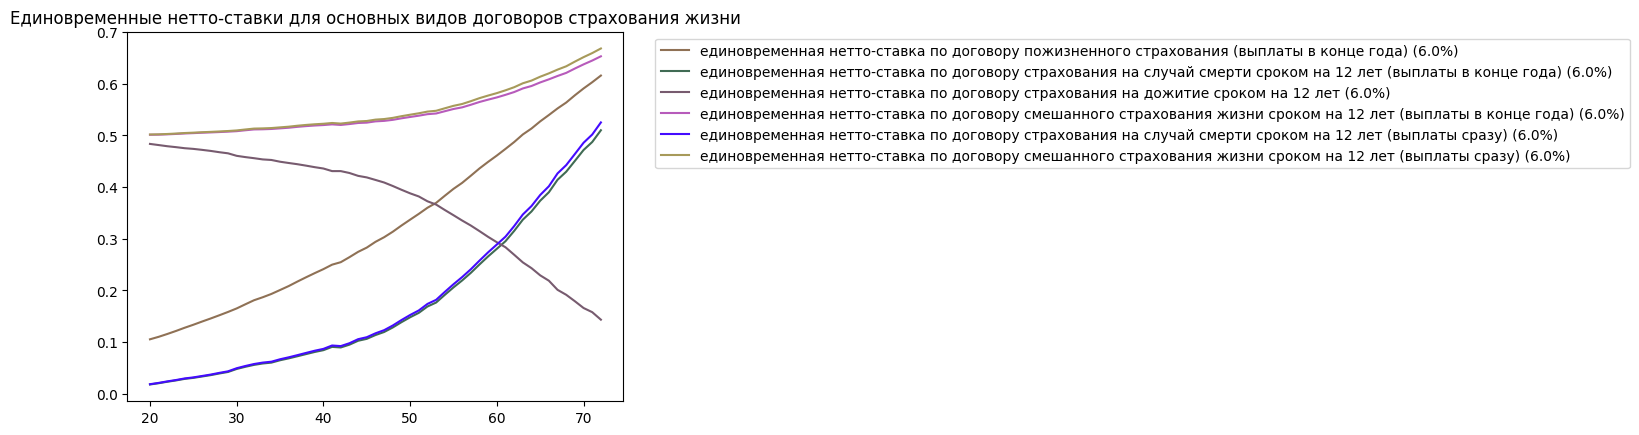

In [28]:
fig, ax = plt.subplots()
dicts1 ={}
srok = 12
i = 0.06
lists1=['единовременная нетто-ставка по договору пожизненного страхования (выплаты в конце года)',
        'единовременная нетто-ставка по договору страхования на случай смерти сроком на '+str(srok)+' лет (выплаты в конце года)',
        'единовременная нетто-ставка по договору страхования на дожитие сроком на '+str(srok)+' лет',
        'единовременная нетто-ставка по договору смешанного страхования жизни сроком на '+str(srok)+' лет (выплаты в конце года)',
        'единовременная нетто-ставка по договору страхования на случай смерти сроком на '+ str(srok)+' лет (выплаты сразу)',
        'единовременная нетто-ставка по договору смешанного страхования жизни сроком на '+str(srok)+' лет (выплаты сразу)']
for j in data1.drop(columns=data1.iloc[:,6:]):
  dicts1[j]=lists1[data1.drop(columns=data1.iloc[:,6:]).columns.get_loc(j)] +' ('+ str(i*100)+'%)'
for j in data1.drop(columns=data1.iloc[:,6:]):
  ax.plot(data1[j], color = "#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]), label = dicts1[j])

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax.set_title("Единовременные нетто-ставки для основных видов договоров страхования жизни")
plt.show()

Нетто-ставки(тарифы) вырастают по всем договорам на случай смерти с увеличением возраста индивида(в договоре смешанного страхования присутствует составляющая договора страхования жизни на срок). Данный факт может обосновываться увеличением вероятности смерти застрахованного. Стоимость страхования жизни на срок дешевле пожизненного страхования, но чем больше возраст страхователя тем менее заметна эта разница.

Рост нетто-ставки по договору пожизненного страхования и договору страхования жизни на срок с увеличением возраста страхователя происходит по-разному. У нетто-ставки пожизненного страхования он более плавный, в то время как у страхового тарифа на срок он происходит по некоторой экспоненте.

Нетто-ставки договоров отличающихся временем выплат практически не отличаются, и их динамика также представляется практически идентичной с небольшими расхождениями в самом конце.

Нетто-ставки по договору на дожитие с увеличением возраста страхователя уменьшаются. Данный факт связан с ростом 𝑞𝑥 => вероятность индивида умереть с каждым годом увеличивается.

Договор смешанного страхования представляется наиболее дорогим.

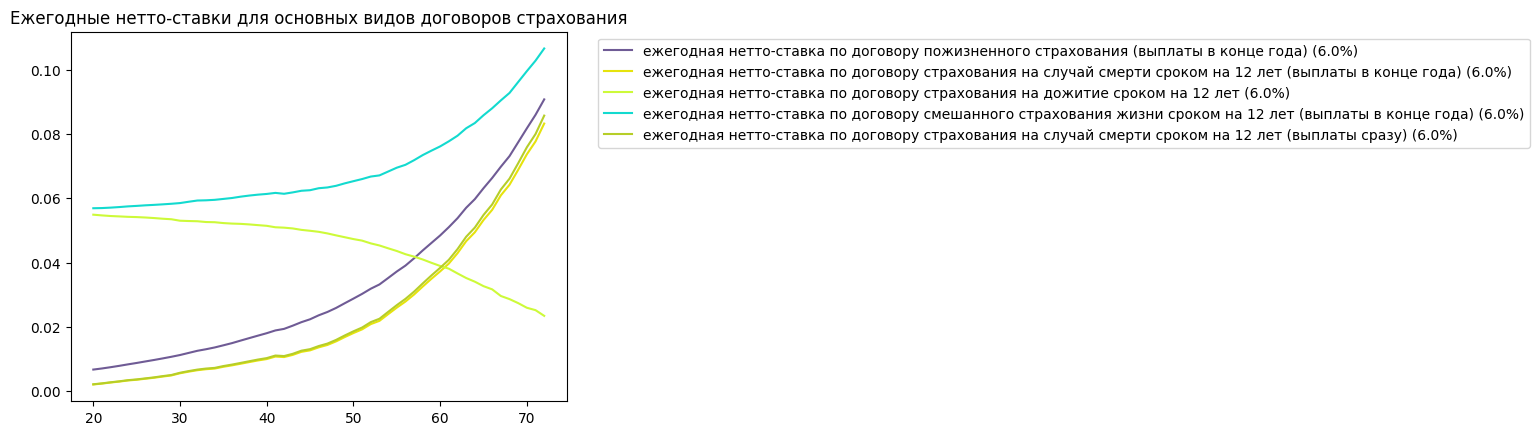

CPU times: user 351 ms, sys: 114 ms, total: 464 ms
Wall time: 355 ms


In [29]:
%%time
fig, ax = plt.subplots()
dicts ={}
srok = 12
lists=['ежегодная нетто-ставка по договору пожизненного страхования (выплаты в конце года)','ежегодная нетто-ставка по договору страхования на случай смерти сроком на '+str(srok)+' лет (выплаты в конце года)','ежегодная нетто-ставка по договору страхования на дожитие сроком на '+str(srok)+' лет','ежегодная нетто-ставка по договору смешанного страхования жизни сроком на '+str(srok)+' лет (выплаты в конце года)','ежегодная нетто-ставка по договору страхования на случай смерти сроком на '+ str(srok)+' лет (выплаты сразу)','ежегодная нетто-ставка по договору смешанного страхования жизни сроком на '+str(srok)+' лет (выплаты сразу)']
for j in data1.drop(columns=data1.iloc[:,:6]):
  dicts[j]=lists[data1.drop(columns=data1.iloc[:,:6]).columns.get_loc(j)]+' ('+ str(i*100)+'%)'
for j in data1.drop(columns=data1.iloc[:,:6]):
  ax.plot(data1[j], color = "#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]), label = dicts[j])

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax.set_title("Ежегодные нетто-ставки для основных видов договоров страхования")
plt.show()

При переходе к ежегодным рисковым премиям можно отметить изменение динамики роста нетто-ставок пожизненного страхования. Динамика становится более крутой, то есть принимает более экспоненциальный характер. При рассмотрении других договоров динамики поведения нетто- ставок с увеличением возраста страхователя практически идентичны.

Выведем часть полученного DataFrame:

In [30]:
data1[::4]

,Ax,Ax:12,12Ex,Ax:12smesh,Ax12nach,Ax:12smeshnach,Px,Px:12,Px:12dozh,Px:12smesh,Px12nach
20,0.105192,0.017714,0.483644,0.501357,0.018240,0.501884,0.006654,0.002011,0.054901,0.056912,0.002071
24,0.127584,0.028546,0.475329,0.503876,0.029394,0.504724,0.008278,0.003257,0.054231,0.057488,0.003354
28,0.151779,0.039033,0.467580,0.506613,0.040193,0.507773,0.010129,0.004478,0.053643,0.058121,0.004611
32,0.180874,0.055681,0.455998,0.511679,0.057335,0.513333,0.012499,0.006454,0.052857,0.059311,0.006646
36,0.208355,0.068299,0.446678,0.514977,0.070328,0.517006,0.014898,0.007971,0.052129,0.060100,0.008208
40,0.241125,0.084162,0.436005,0.520167,0.086662,0.522667,0.017985,0.009928,0.051434,0.061362,0.010223
44,0.274546,0.102375,0.421777,0.524152,0.105417,0.527194,0.021422,0.012178,0.050172,0.062350,0.012540
48,0.313551,0.128125,0.402133,0.530258,0.131931,0.534064,0.025855,0.015439,0.048457,0.063896,0.015898
52,0.360004,0.168719,0.372519,0.541238,0.173731,0.546250,0.031840,0.020817,0.045963,0.066780,0.021436
56,0.408203,0.219206,0.335247,0.554453,0.225718,0.560965,0.039044,0.027849,0.042591,0.070440,0.028676


Вывод:

1)Страховании на дожитие на срок 12 лет:

Единовременная рисковая премия уменьшается с 0.483644 для 20-летнего страхователя до 0.143218 для 72-летнего страхователя. Сумма ежегодных взносов при страховании на дожитие на срок 12 лет больше единовременного.

2) Пожизненное страхование на случай смерти:

Единовременная рисковая премия увеличивается 0.105104 для 20-летнего до 0.611593 для 72-летнего.

3) Страховании жизни на случай смерти на срок 12 лет выплаты в конце года/сразу после смерти:

Единовременная рисковая премия увеличивается с 0.017714/0.018240 для 20-летнего страхователя до 0.510112/0.525267 для 72-летнего страхователя.Данный факт можеть обьясняться ростом qx смерти в течение срока действия договора.

4) Смешанное страховании жизни на срок 12 лет выплаты в конце года/сразу после смерти:

Единовременная рисковая премия возросли с 0.501357/0,42 для 20-летнего страхователя до 0.653330/0.668485 для 72-летнего страхователя.

Рост стоимости может быть обслувлен:

* высокая начальная цена составляющей договора страхования на дожитие
* высокая конечная цена составляющей договора страхования на случай смерти
* в случае ежегодных нетто-премий учитывается риск недополучения премий из-за возможной смерти застрахованного в период действия договора.

Построим датафрейм для дальнейшей работы с данными, а кокретнее добавим колонки Dx,Cx,Nx,Rx и Mx, которые будем рассчитывать на основе демографической статистики за 2020 год, изменив срок договра на 18 лет:

In [31]:
data2 = pd.DataFrame()
raschetstavok(data2,data2020,0.06,18,72)

100%|██████████| 53/53 [00:00<00:00, 408.58it/s]


,Ax,Ax:18,18Ex,Ax:18smesh,Ax18nach,Ax:18smeshnach,Px,Px:18,Px:18dozh,Px:18smesh,Px18nach
20,0.105192,0.030912,0.329645,0.360557,0.031830,0.361475,0.006654,0.002736,0.029180,0.031917,0.002818
21,0.110020,0.033510,0.327836,0.361347,0.034506,0.362342,0.006997,0.002970,0.029056,0.032026,0.003058
22,0.115530,0.037035,0.325536,0.362571,0.038135,0.363671,0.007394,0.003289,0.028908,0.032196,0.003386
23,0.121377,0.040605,0.323403,0.364008,0.041811,0.365214,0.007820,0.003614,0.028783,0.032397,0.003721
24,0.127584,0.046283,0.319379,0.365661,0.047658,0.367036,0.008278,0.004130,0.028499,0.032629,0.004253
25,0.133388,0.049450,0.317637,0.367086,0.050919,0.368556,0.008712,0.004422,0.028407,0.032830,0.004554
26,0.139553,0.052831,0.315874,0.368705,0.054400,0.370275,0.009180,0.004737,0.028322,0.033059,0.004878
27,0.145525,0.056961,0.313144,0.370105,0.058653,0.371797,0.009640,0.005119,0.028140,0.033258,0.005271
28,0.151779,0.060229,0.311458,0.371687,0.062018,0.373477,0.010129,0.005426,0.028059,0.033485,0.005587
29,0.158193,0.064722,0.308574,0.373296,0.066645,0.375219,0.010637,0.005846,0.027870,0.033716,0.006019


Построим график для визуального сравнения изменений, произошедших при изменении срока договоров с 12 на 18:

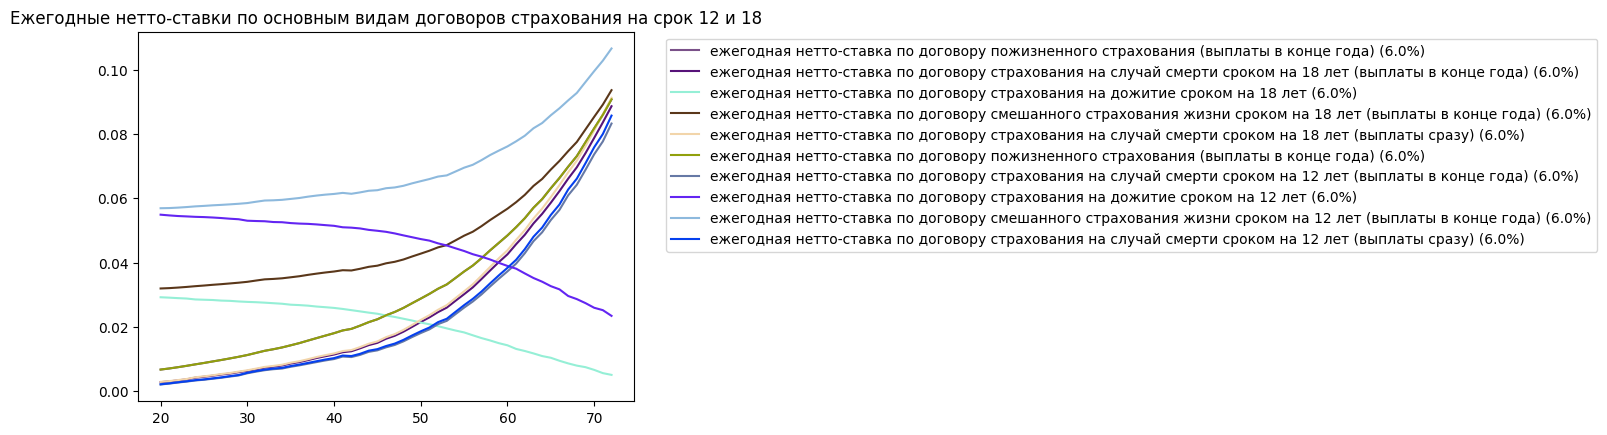

In [32]:
fig, ax = plt.subplots()
dicts3 ={}
srok = 18
lists3=['ежегодная нетто-ставка по договору пожизненного страхования (выплаты в конце года)','ежегодная нетто-ставка по договору страхования на случай смерти сроком на '+str(srok)+' лет (выплаты в конце года)','ежегодная нетто-ставка по договору страхования на дожитие сроком на '+str(srok)+' лет','ежегодная нетто-ставка по договору смешанного страхования жизни сроком на '+str(srok)+' лет (выплаты в конце года)','ежегодная нетто-ставка по договору страхования на случай смерти сроком на '+ str(srok)+' лет (выплаты сразу)','ежегодная нетто-ставка по договору смешанного страхования жизни сроком на '+str(srok)+' лет (выплаты сразу)']
for j in data2.drop(columns=data2.iloc[:,:6]):
  dicts3[j]=lists3[data2.drop(columns=data2.iloc[:,:6]).columns.get_loc(j)]+' ('+ str(i*100)+'%)'
for j in data2.drop(columns=data2.iloc[:,:6]):
  ax.plot(data2[j], color = "#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]), label = dicts3[j])
for j in data1.drop(columns=data1.iloc[:,:6]):
  ax.plot(data1[j], color = "#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]), label = dicts[j])

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Ежегодные нетто-ставки по основным видам договоров страхования на срок 12 и 18")
plt.show()

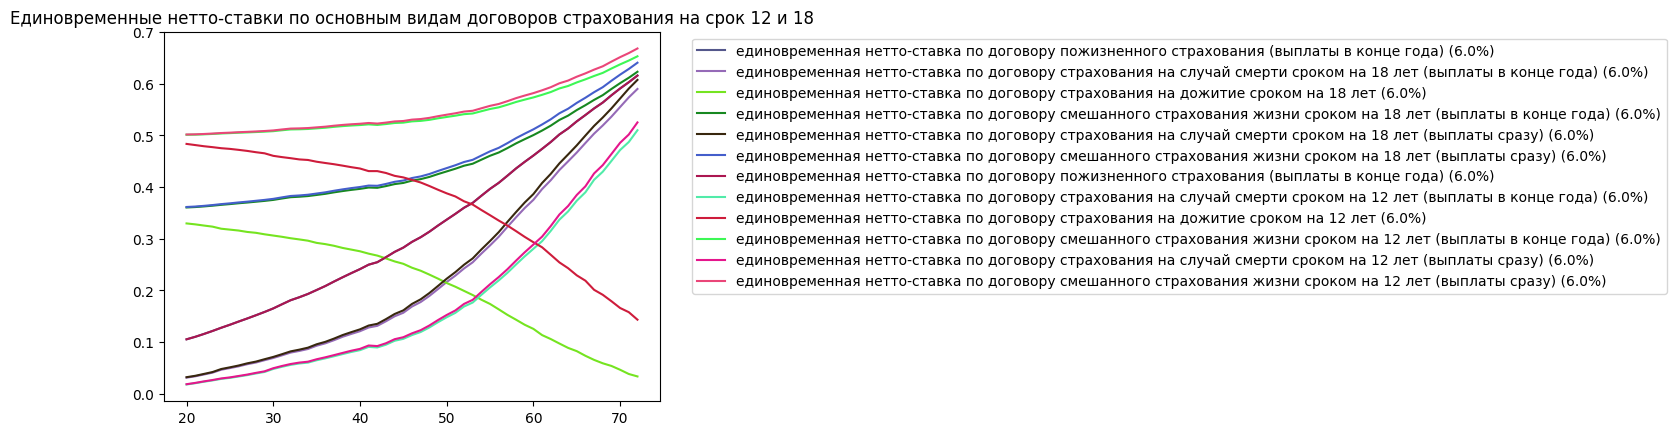

In [33]:
fig, ax = plt.subplots()
dicts2 ={}
srok = 18
lists2=['единовременная нетто-ставка по договору пожизненного страхования (выплаты в конце года)','единовременная нетто-ставка по договору страхования на случай смерти сроком на '+str(srok)+' лет (выплаты в конце года)','единовременная нетто-ставка по договору страхования на дожитие сроком на '+str(srok)+' лет','единовременная нетто-ставка по договору смешанного страхования жизни сроком на '+str(srok)+' лет (выплаты в конце года)','единовременная нетто-ставка по договору страхования на случай смерти сроком на '+ str(srok)+' лет (выплаты сразу)','единовременная нетто-ставка по договору смешанного страхования жизни сроком на '+str(srok)+' лет (выплаты сразу)']
for j in data2.drop(columns=data2.iloc[:,6:]):
  dicts2[j]=lists2[data2.drop(columns=data2.iloc[:,6:]).columns.get_loc(j)]+' ('+ str(i*100)+'%)'
for j in data2.drop(columns=data2.iloc[:, 6:]):
  ax.plot(data2[j], color = "#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]), label = dicts2[j])
for j in data1.drop(columns=data1.iloc[:,6:]):
  ax.plot(data1[j], color = "#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]), label = dicts1[j])

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Единовременные нетто-ставки по основным видам договоров страхования на срок 12 и 18")
plt.show()

Выведем отдельно нетто-ставки для i = 6% и срока = 18 для различных видов договоров, выбрав каждый 4-ый x:

In [34]:
data2[::4]

,Ax,Ax:18,18Ex,Ax:18smesh,Ax18nach,Ax:18smeshnach,Px,Px:18,Px:18dozh,Px:18smesh,Px18nach
20,0.105192,0.030912,0.329645,0.360557,0.031830,0.361475,0.006654,0.002736,0.029180,0.031917,0.002818
24,0.127584,0.046283,0.319379,0.365661,0.047658,0.367036,0.008278,0.004130,0.028499,0.032629,0.004253
28,0.151779,0.060229,0.311458,0.371687,0.062018,0.373477,0.010129,0.005426,0.028059,0.033485,0.005587
32,0.180874,0.079475,0.300958,0.380433,0.081836,0.382794,0.012499,0.007261,0.027496,0.034756,0.007477
36,0.208355,0.097387,0.289572,0.386959,0.100280,0.389852,0.014898,0.008992,0.026737,0.035729,0.009259
40,0.241125,0.120880,0.275697,0.396577,0.124471,0.400168,0.017985,0.011339,0.025862,0.037201,0.011676
44,0.274546,0.149790,0.256029,0.405819,0.154240,0.410269,0.021422,0.014269,0.024390,0.038660,0.014693
48,0.313551,0.189140,0.230559,0.419700,0.194759,0.425319,0.025855,0.018449,0.022489,0.040938,0.018997
52,0.360004,0.242388,0.199006,0.441394,0.249589,0.448595,0.031840,0.024561,0.020165,0.044727,0.025291
56,0.408203,0.303724,0.163252,0.466976,0.312747,0.475999,0.039044,0.032254,0.017336,0.049590,0.033212


Выведем отдельно нетто-ставки для i = 6% и срока = 12 годам для различных видов договоров, выбрав каждый 4-ый x:

In [35]:
data1[::4]

,Ax,Ax:12,12Ex,Ax:12smesh,Ax12nach,Ax:12smeshnach,Px,Px:12,Px:12dozh,Px:12smesh,Px12nach
20,0.105192,0.017714,0.483644,0.501357,0.018240,0.501884,0.006654,0.002011,0.054901,0.056912,0.002071
24,0.127584,0.028546,0.475329,0.503876,0.029394,0.504724,0.008278,0.003257,0.054231,0.057488,0.003354
28,0.151779,0.039033,0.467580,0.506613,0.040193,0.507773,0.010129,0.004478,0.053643,0.058121,0.004611
32,0.180874,0.055681,0.455998,0.511679,0.057335,0.513333,0.012499,0.006454,0.052857,0.059311,0.006646
36,0.208355,0.068299,0.446678,0.514977,0.070328,0.517006,0.014898,0.007971,0.052129,0.060100,0.008208
40,0.241125,0.084162,0.436005,0.520167,0.086662,0.522667,0.017985,0.009928,0.051434,0.061362,0.010223
44,0.274546,0.102375,0.421777,0.524152,0.105417,0.527194,0.021422,0.012178,0.050172,0.062350,0.012540
48,0.313551,0.128125,0.402133,0.530258,0.131931,0.534064,0.025855,0.015439,0.048457,0.063896,0.015898
52,0.360004,0.168719,0.372519,0.541238,0.173731,0.546250,0.031840,0.020817,0.045963,0.066780,0.021436
56,0.408203,0.219206,0.335247,0.554453,0.225718,0.560965,0.039044,0.027849,0.042591,0.070440,0.028676


* **Пожизненной страхование:**

Изменение срока действия договора никаким образом не отражается на рисковых премиях по договору пожизненного страхования на случай смерти.

* **Страхование на дожитие:**

Увеличение срока страхования на дожитие привело к снижению нетто-ставок примерно в 2 раза для 20-летнего индивида и увеличению для 72-летнего. Последнее обусловлено высокой вероятностью смерти.

* **Страхование на случай смерти:**

Увеличение срока страхования на случай смерти привело к росту нетто-ставок как для 20-летнего индивида,так и для 72-летнего. Величина увелечения гораздо меньше для 72-летнего индивида, что может быть обусловлено все более высокой вероятностью смерти в течении срока договора.

* **Смешанное страхование:**

Увеличение срока смешанного страхования привело к уменьшению нетто-ставок как для 20-летнего индивида,так и для 72-летнего. Величина уменьшения гораздо меньше для 72-летнего индивида.

Построим датафрейм для дальнейшей работы с данными, а кокретнее добавим колонки Dx,Cx,Nx,Rx и Mx, которые будем рассчитывать на основе демографической статистики за 2020 год, изменив норму доходности на 0.12:

In [36]:
data3 = pd.DataFrame()
raschetstavok(data3,data2020,0.12,12,72)

100%|██████████| 53/53 [00:00<00:00, 406.83it/s]


,Ax,Ax:12,12Ex,Ax:12smesh,Ax12nach,Ax:12smeshnach,Px,Px:12,Px:12dozh,Px:12smesh,Px12nach
20,0.029516,0.012395,0.249793,0.262188,0.013125,0.262917,0.003259,0.001800,0.036274,0.038074,0.001906
21,0.031443,0.013798,0.248647,0.262446,0.014611,0.263258,0.003478,0.002004,0.036120,0.038125,0.002122
22,0.034024,0.015714,0.247478,0.263192,0.016640,0.264117,0.003774,0.002285,0.035987,0.038272,0.002420
23,0.036918,0.017616,0.246554,0.264170,0.018653,0.265207,0.004107,0.002565,0.035900,0.038465,0.002716
24,0.040164,0.019879,0.245498,0.265377,0.021049,0.266548,0.004483,0.002899,0.035805,0.038705,0.003070
25,0.042940,0.021376,0.244819,0.266195,0.022634,0.267454,0.004807,0.003121,0.035746,0.038867,0.003305
26,0.046055,0.023343,0.243852,0.267195,0.024718,0.268569,0.005173,0.003413,0.035653,0.039066,0.003614
27,0.048909,0.025147,0.242792,0.267939,0.026628,0.269420,0.005510,0.003681,0.035535,0.039215,0.003897
28,0.052009,0.027325,0.241496,0.268821,0.028934,0.270430,0.005878,0.004004,0.035387,0.039392,0.004240
29,0.055227,0.029377,0.240387,0.269764,0.031107,0.271494,0.006263,0.004310,0.035270,0.039581,0.004564


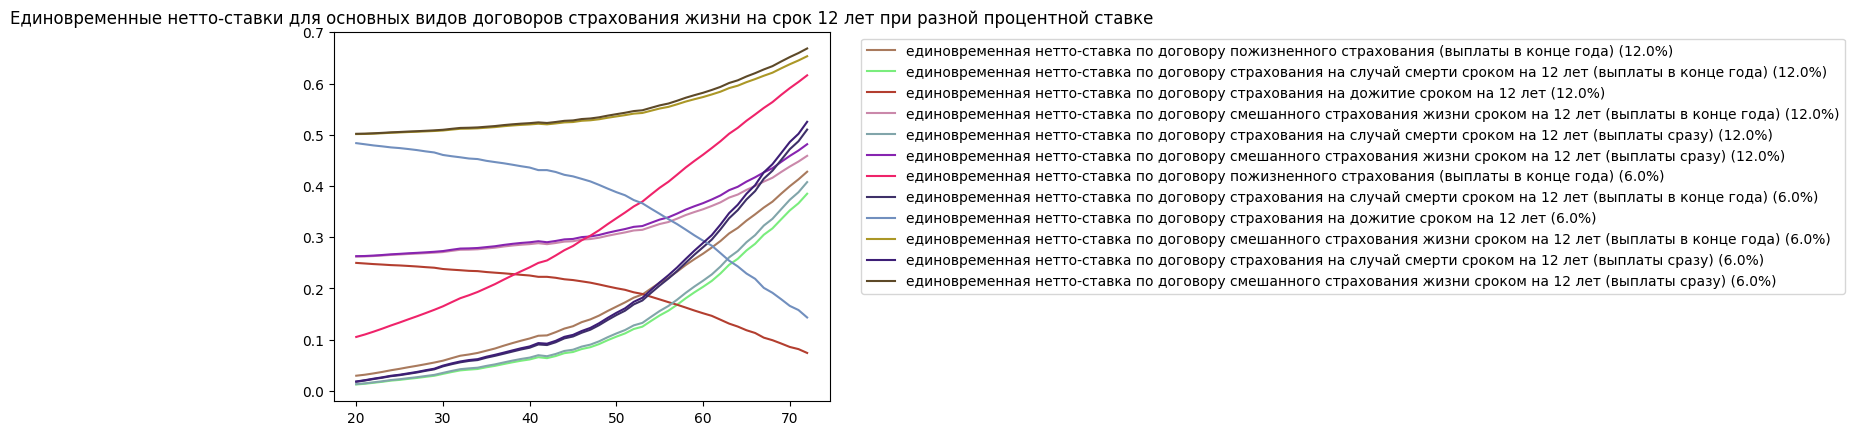

In [37]:
fig, ax = plt.subplots()
dicts3 ={}
srok = 12
i = 0.12
for j in data3.drop(columns=data3.iloc[:,6:]):
  dicts3[j]=lists1[data3.drop(columns=data3.iloc[:,6:]).columns.get_loc(j)]+' ('+ str(i*100)+'%)'
for j in data3.drop(columns=data3.iloc[:,6:]):
  ax.plot(data3[j], color = "#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]), label = dicts3[j])
for j in data1.drop(columns=data1.iloc[:,6:]):
  ax.plot(data1[j], color = "#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]), label = dicts1[j])

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax.set_title("Единовременные нетто-ставки для основных видов договоров страхования жизни на срок 12 лет при разной процентной ставке")
plt.show()

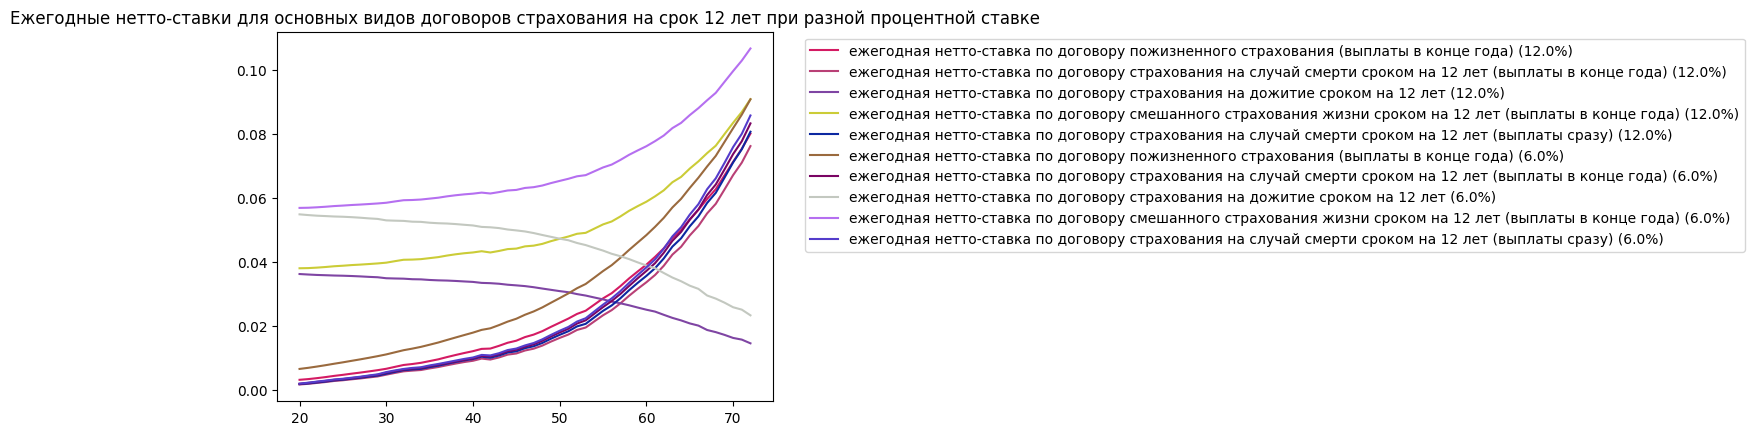

In [38]:
fig, ax = plt.subplots()
dicts4 ={}
srok = 12
for j in data3.drop(columns=data3.iloc[:,:6]):
  dicts4[j]=lists[data3.drop(columns=data3.iloc[:,:6]).columns.get_loc(j)]+' ('+ str(i*100)+'%)'
for j in data3.drop(columns=data3.iloc[:,:6]):
  ax.plot(data3[j], color = "#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]), label = dicts4[j])
for j in data1.drop(columns=data1.iloc[:,:6]):
  ax.plot(data1[j], color = "#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]), label = dicts[j])

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax.set_title("Ежегодные нетто-ставки для основных видов договоров страхования на срок 12 лет при разной процентной ставке")
plt.show()

Выведем отдельно нетто-ставки для i = 6% для различных видов договоров, выбрав каждый 4-ый x:

In [39]:
data1[::4]

,Ax,Ax:12,12Ex,Ax:12smesh,Ax12nach,Ax:12smeshnach,Px,Px:12,Px:12dozh,Px:12smesh,Px12nach
20,0.105192,0.017714,0.483644,0.501357,0.018240,0.501884,0.006654,0.002011,0.054901,0.056912,0.002071
24,0.127584,0.028546,0.475329,0.503876,0.029394,0.504724,0.008278,0.003257,0.054231,0.057488,0.003354
28,0.151779,0.039033,0.467580,0.506613,0.040193,0.507773,0.010129,0.004478,0.053643,0.058121,0.004611
32,0.180874,0.055681,0.455998,0.511679,0.057335,0.513333,0.012499,0.006454,0.052857,0.059311,0.006646
36,0.208355,0.068299,0.446678,0.514977,0.070328,0.517006,0.014898,0.007971,0.052129,0.060100,0.008208
40,0.241125,0.084162,0.436005,0.520167,0.086662,0.522667,0.017985,0.009928,0.051434,0.061362,0.010223
44,0.274546,0.102375,0.421777,0.524152,0.105417,0.527194,0.021422,0.012178,0.050172,0.062350,0.012540
48,0.313551,0.128125,0.402133,0.530258,0.131931,0.534064,0.025855,0.015439,0.048457,0.063896,0.015898
52,0.360004,0.168719,0.372519,0.541238,0.173731,0.546250,0.031840,0.020817,0.045963,0.066780,0.021436
56,0.408203,0.219206,0.335247,0.554453,0.225718,0.560965,0.039044,0.027849,0.042591,0.070440,0.028676


Выведем отдельно нетто-ставки для i = 12% для различных видов договоров, выбрав каждый 4-ый x:

In [40]:
data3[::4]

,Ax,Ax:12,12Ex,Ax:12smesh,Ax12nach,Ax:12smeshnach,Px,Px:12,Px:12dozh,Px:12smesh,Px12nach
20,0.029516,0.012395,0.249793,0.262188,0.013125,0.262917,0.003259,0.001800,0.036274,0.038074,0.001906
24,0.040164,0.019879,0.245498,0.265377,0.021049,0.266548,0.004483,0.002899,0.035805,0.038705,0.003070
28,0.052009,0.027325,0.241496,0.268821,0.028934,0.270430,0.005878,0.004004,0.035387,0.039392,0.004240
32,0.068538,0.039914,0.235514,0.275428,0.042264,0.277778,0.007884,0.005902,0.034826,0.040728,0.006250
36,0.082629,0.048747,0.230701,0.279447,0.051616,0.282317,0.009651,0.007248,0.034304,0.041553,0.007675
40,0.102211,0.061251,0.225188,0.286439,0.064856,0.290045,0.012198,0.009197,0.033813,0.043009,0.009738
44,0.121540,0.073524,0.217840,0.291364,0.077852,0.295692,0.014824,0.011116,0.032936,0.044053,0.011771
48,0.146867,0.091231,0.207694,0.298925,0.096602,0.304296,0.018445,0.013943,0.031741,0.045684,0.014763
52,0.181892,0.120685,0.192399,0.313084,0.127790,0.320189,0.023821,0.018824,0.030010,0.048834,0.019932
56,0.220421,0.156468,0.173149,0.329617,0.165679,0.338827,0.030294,0.025007,0.027673,0.052680,0.026479


Интепретация:

Нетто-ставки по всем видам договоров уменьшаются при увелечении нормы доходности с 6% до 12%. Данный факт может быть обусловлен тем,что страховщик закладывает в тариф большую доходность от вложенных средств.

Величина уменьшения более заметна на единовременных нетто-ставках, а не на ежегодных, так как появляется риск недополучения страховых взносов.

В этой работе я постарался рассмотреть возможность использование питона, для проведения акутарных исследований